
# DAC-ADC Pmod Examples using Matplotlib and Widget

----

## Contents


[Pmod DAC-ADC Feedback](#Pmod-DAC-ADC-Feedback)

[Tracking the IO Error](#Tracking-the-IO-Error)

[Error plot with Matplotlib](#Error-plot-with-Matplotlib)

[Widget controlled plot](#Widget-controlled-plot)

----

## Pmod DAC-ADC Feedback

This example shows how to use the PmodDA4 DAC and the PmodAD2 ADC on the board, using the board's two Pmod interfaces. The notebook then compares the DAC output to the ADC input and tracks the errors.

The errors are plotted using Matplotlib and an XKCD version of the plot is produced (for fun). Finally a slider widget is introduced to control the number of samples diaplayed in the error plot.

Note: The output of the DAC (pin A) must be connected with a wire to the input of the ADC (V1 input).

### 1. Import hardware libraries and classes

In [1]:
from pynq.overlays.base import BaseOverlay
from pynq.lib import Pmod_DAC
from pynq.lib import Pmod_ALS

### 2. Program the ZYNQ PL

In [2]:
ol = BaseOverlay("base.bit")

### 3. Instantiate the Pmod peripherals as Python objects

In [25]:
dac = Pmod_DAC(ol.PMODA)
my_als = Pmod_ALS(ol.PMODB)

dac.write(0.0)
illum = my_als.read()
print(illum)
#adc = Pmod_ADC(ol.PMODA)

11


In [64]:
import time
import numpy as np
import matplotlib.pyplot as plt

error = 0
kp = 4
ki = 0
kd = 0.1
i = 0
d = 0
integral = 0
derivative = 0
samples = []
light =[]
prev_op = 0
dac.write(0.0)

while True:
    pv_prev = illum
   
    illum = my_als.read()
    i_prev = integral
    d_prev = derivative
    setpoint = 75 
    error_prev = error
    error = setpoint - illum 
    
    integral = error + i_prev
    derivative = error - error_prev

    p = kp * error
    i = ki * integral 
    d = kd * derivative

    result = p+i+d

    op = prev_op + (result * 0.2)
    prev_op = op
    drive = illum  + op
    pmod_op = (op/100)
  
    
    samples.append(pmod_op)
    light.append(illum)
    dac.write( pmod_op)
    time.sleep(1)
    
    print("result " + str(result))
    print("integral " + str(integral))
    print("derivative " + str(derivative))
    print("error " + str(error))
    print("error_prev " + str(error_prev))
    print("illum " + str(illum))
    print("drive " + str(drive))
    print("i " + str(i))
    print("d " + str(d))
    print("i_prev " + str(i_prev))
    print("d_prev " + str(d_prev))
    print("pmod_op " + str(pmod_op))
    print("op " + str(op))
    print("op_prev " + str(prev_op))
    print("-----")



result 299.3
integral 73
derivative 73
error 73
error_prev 0
illum 2
drive 61.86000000000001
i 0
d 7.300000000000001
i_prev 0
d_prev 0
pmod_op 0.5986
op 59.86000000000001
op_prev 59.86000000000001
-----
result 292.0
integral 146
derivative 0
error 73
error_prev 73
illum 2
drive 120.26000000000002
i 0
d 0.0
i_prev 73
d_prev 73
pmod_op 1.1826
op 118.26000000000002
op_prev 118.26000000000002
-----
result 296.1
integral 220
derivative 1
error 74
error_prev 73
illum 1
drive 178.48000000000002
i 0
d 0.1
i_prev 146
d_prev 0
pmod_op 1.7748000000000002
op 177.48000000000002
op_prev 177.48000000000002
-----
result 279.6
integral 290
derivative -4
error 70
error_prev 74
illum 5
drive 238.40000000000003
i 0
d -0.4
i_prev 220
d_prev 1
pmod_op 2.3340000000000005
op 233.40000000000003
op_prev 233.40000000000003
-----
result -31.6
integral 284
derivative -76
error -6
error_prev 70
illum 81
drive 308.08000000000004
i 0
d -7.6000000000000005
i_prev 290
d_prev -4
pmod_op 2.2708000000000004
op 227.0800000

result 4.2
integral 287
derivative 2
error 1
error_prev -1
illum 74
drive 303.6200000000001
i 0
d 0.2
i_prev 286
d_prev -2
pmod_op 2.2962000000000007
op 229.6200000000001
op_prev 229.6200000000001
-----
result -4.2
integral 286
derivative -2
error -1
error_prev 1
illum 76
drive 304.7800000000001
i 0
d -0.2
i_prev 287
d_prev 2
pmod_op 2.2878000000000007
op 228.7800000000001
op_prev 228.7800000000001
-----
result 4.2
integral 287
derivative 2
error 1
error_prev -1
illum 74
drive 303.6200000000001
i 0
d 0.2
i_prev 286
d_prev -2
pmod_op 2.2962000000000007
op 229.6200000000001
op_prev 229.6200000000001
-----
result -4.2
integral 286
derivative -2
error -1
error_prev 1
illum 76
drive 304.7800000000001
i 0
d -0.2
i_prev 287
d_prev 2
pmod_op 2.2878000000000007
op 228.7800000000001
op_prev 228.7800000000001
-----
result 4.2
integral 287
derivative 2
error 1
error_prev -1
illum 74
drive 303.6200000000001
i 0
d 0.2
i_prev 286
d_prev -2
pmod_op 2.2962000000000007
op 229.6200000000001
op_prev 229.6

KeyboardInterrupt: 

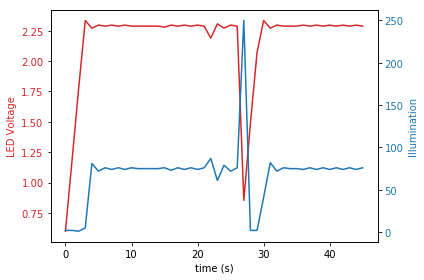

In [65]:
%matplotlib inline
    
X = np.arange(len(samples))
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('LED Voltage', color=color)
ax1.plot(X,samples , color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Illumination', color=color)  # we already handled the x-label with ax1
ax2.plot(X, light, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()



----

[Contents](#Contents)

----

## Tracking the IO Error
Report DAC-ADC Pmod Loopback Measurement Error.

In [ ]:
from math import ceil
from time import sleep
import numpy as np
import matplotlib.pyplot as plt
from pynq.lib import Pmod_ADC, Pmod_DAC
from pynq.overlays.base import BaseOverlay

ol = BaseOverlay("base.bit")

dac = Pmod_DAC(ol.PMODB)
adc = Pmod_ADC(ol.PMODA)

delay = 0.0values = np.linspace(0, 2, 20)
samples = []
for value in values:
    dac.write(value)
    sleep(delay)
    sample = adc.read()
    samples.append(sample[0])
    print('Value written: {:4.2f}\tSample read: {:4.2f}\tError: {:+4.4f}'.
          format(value, sample[0], sample[0]-value))

----

[Contents](#Contents)

----

## Error plot with Matplotlib
This example shows plots in notebook (rather than in separate window).

In [ ]:
%matplotlib inline
    
X = np.arange(len(values))
plt.bar(X + 0.0, values, facecolor='blue', 
        edgecolor='white', width=0.5, label="Written_to_DAC")
plt.bar(X + 0.25, samples, facecolor='red', 
        edgecolor='white', width=0.5, label="Read_from_ADC")

plt.title('DAC-ADC Linearity')
plt.xlabel('Sample_number')
plt.ylabel('Volts')
plt.legend(loc='upper left', frameon=False)

plt.show()

----

[Contents](#Contents)

----

## Widget controlled plot

In this example, we extend the IO plot with a slider widget to control the number of samples appearing in the output plot.

We use the `ipwidgets` library and the simple `interact()` method to launch a slider bar.

> The interact function (ipywidgets.interact) automatically creates user interface (UI) controls for exploring code and data interactively. It is the easiest way to get started using IPython’s widgets.

For more details see [Using ipwidgets interact()](https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html#)

In [ ]:
from math import ceil
from time import sleep
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from ipywidgets import interact
import ipywidgets as widgets

ol = BaseOverlay("base.bit")

dac = Pmod_DAC(ol.PMODB)
adc = Pmod_ADC(ol.PMODA)

def capture_samples(nmbr_of_samples):
    delay = 0.0
    values = np.linspace(0, 2, nmbr_of_samples)
    samples = []
    for value in values:
        dac.write(value)
        sleep(delay)
        sample = adc.read()
        samples.append(sample[0])

    X = np.arange(nmbr_of_samples)
    plt.bar(X + 0.0, values[:nmbr_of_samples+1], 
            facecolor='blue', edgecolor='white', 
            width=0.5, label="Written_to_DAC")
    plt.bar(X + 0.25, samples[:nmbr_of_samples+1], 
            facecolor='red', edgecolor='white', 
            width=0.5, label="Read_from_ADC")

    plt.title('DAC-ADC Linearity')
    plt.xlabel('Sample_number')
    plt.ylabel('Volts')
    plt.legend(loc='upper left', frameon=False)
    plt.show()

_ = interact(capture_samples, 
             nmbr_of_samples=widgets.IntSlider(
                 min=5, max=30, step=5,
                 value=10, continuous_update=False))

----

[Contents](#Contents)

----